        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635        

<AxesSubplot:xlabel='Day', ylabel='PRIVATE Vehicle'>

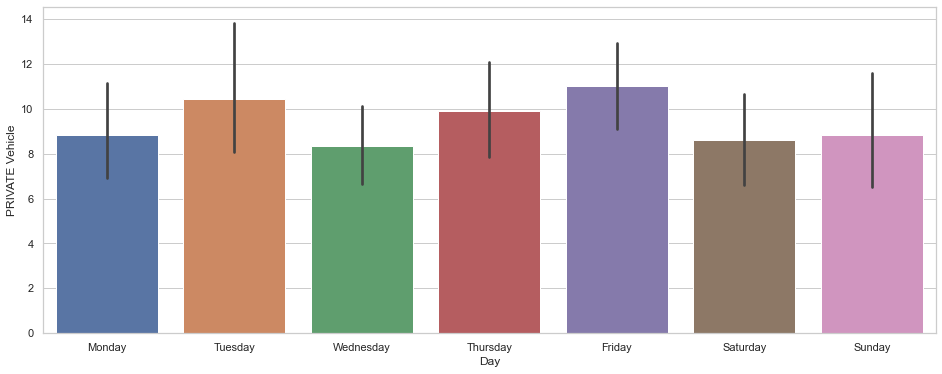

In [3]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt



dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")
#df = pd.read_csv(file, parse_dates=['T'], index_col=['T'])

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek


print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "PRIVATE Vehicle", data = dailycollection )




<AxesSubplot:xlabel='Day', ylabel='PRIVATE Vehicle'>

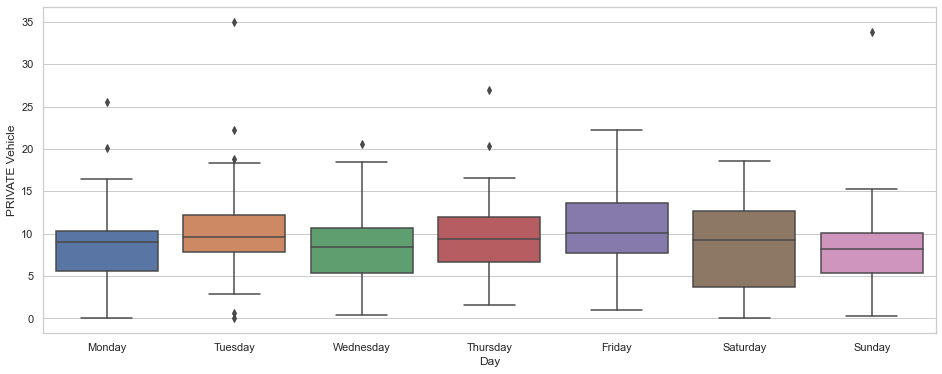

In [4]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['PRIVATE Vehicle'])

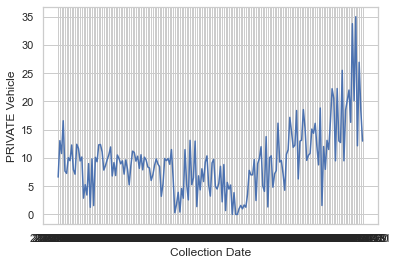

In [5]:
sns.lineplot(data=dailycollection, x="Collection Date", y="PRIVATE Vehicle")
diff_dailycollection = dailycollection["Door TO Door"].diff()

# sns.lineplot(data=dailycollection, x="Collection Date", y=diff_dailycollection)


In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dailycollection["PRIVATE Vehicle"])

print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


(-2.6183110930148374, 0.08927148397061502, 2, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 954.5594535238884)
ADF Statistic: -2.618311
p-value: 0.089271
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576



Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

ADF Statistic is -2.62  is > p-value @ 1% and p-value = 0.089 is > 0.05 so we failed to reject the null hypothesis (non stationary).
This means that the process has unit root which implies that it has time dependent structure and time series is non stationary.



In [7]:
data_Xsform = dailycollection['PRIVATE Vehicle'].diff().dropna()
result =  adfuller((data_Xsform))

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.647072
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


After differencing
Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

ADF Statistic is -6.52  is < p-value @ 1% and p-value = 0.000 is < 0.05 so we failed to reject the null hypothesis (non stationary).
This means that the process doesn't have unit root which implies that it has time dependent structure and time series is  stationary.

<AxesSubplot:xlabel='Collection Date', ylabel='Door TO Door'>

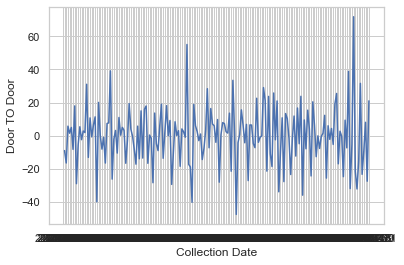

In [8]:
sns.lineplot(data=dailycollection, x="Collection Date", y=diff_dailycollection)

# Time Series Data Analysis of Garbage Collection Data 

In [9]:
from pylab import rcParams
dailycollection_idx = dailycollection[:]

print(min(dailycollection_idx["Collection Date"]))
print(max(dailycollection_idx['Collection Date']))

#Sorting by date
dailycollection_idx = dailycollection_idx.sort_values('Collection Date')
dailycollection_idx['Collection Date'] = pd.to_datetime(dailycollection_idx['Collection Date'])


2021-02-01
2021-07-31


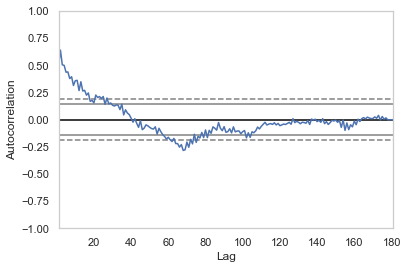

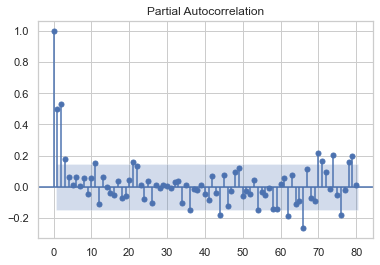

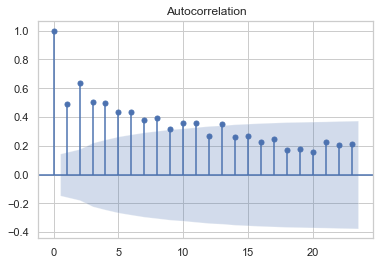

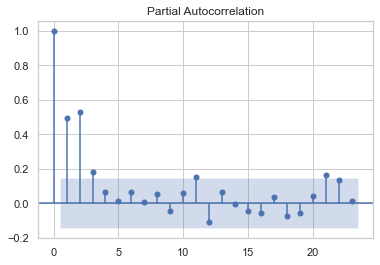

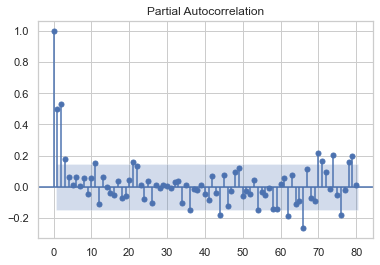

In [10]:
# # Creating Autocorrelation plot

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


autocorrelation_plot(dailycollection_idx['PRIVATE Vehicle'])

plt.show()
plot_acf(dailycollection_idx['PRIVATE Vehicle'])
plot_pacf(dailycollection_idx['PRIVATE Vehicle'])
plot_pacf(dailycollection_idx['PRIVATE Vehicle'], lags = 80)

In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Collection Date
2021-02-01     6.600
2021-02-02    13.055
2021-02-03    10.780
2021-02-04    16.580
2021-02-05     7.675
               ...  
2021-07-27    34.990
2021-07-28    12.150
2021-07-29    26.930
2021-07-30    18.410
2021-07-31    12.985
Freq: D, Name: PRIVATE Vehicle, Length: 181, dtype: float64


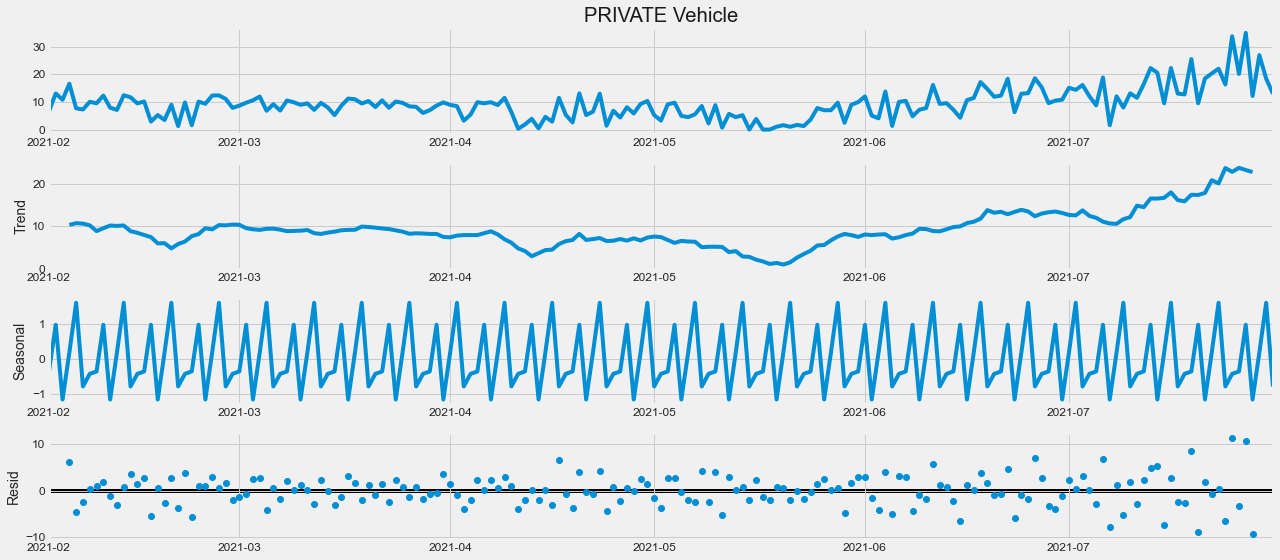

In [12]:

#Resample using the average of daily garbage collection. However in this case the daily average would be same because it is one record .
daily_resampled = dailycollection_idx.reset_index().set_index("Collection Date").resample('D')['PRIVATE Vehicle'].sum()
print(daily_resampled)

#Seasonality Patterns
rcParams['figure.figsize'] = [18,8]

# Seasonal Decomposition by Moving Averages
decomposition = sm.tsa.seasonal_decompose(daily_resampled, model='additive')
fig = decomposition.plot()
plt.show()



In [13]:
# data_Xsform = dailycollection [['Collection Date','PRIVATE Vehicle']]
# data_Xsform[['PRIVATE Vehicle']] = dailycollection['PRIVATE Vehicle'].diff()
# # print(data_Xsform.drop(0))
# plot_acf(data_Xsform['PRIVATE Vehicle'], lags = 50)
#
# plot_pacf(data_Xsform['PRIVATE Vehicle'], lags = 50)

In [14]:
#p = Seasonality , d = Trend and q = Noise
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [15]:
aic_result = []
param_min_aci = {}

for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print('Minimun AIC{} with paramaters {}',min(aic_result), param_min_aci[min(aic_result)])

ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1377.635767593171
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:1221.4490230223173
ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:1134.4701683466521
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1092.0910881395807
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1018.9139321119926
ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:975.2588411588691
ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:1199.2083215348298
ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:1026.9105451618254
ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:940.169271563204
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1097.516157269936
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1058.8782624129444
ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:1018.8605118466041
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1034.1843369909316
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1021.2896492573057
ARIMA(0, 0, 0)x(1, 1, 2, 7) - AIC:975.1041323938923
ARIMA(0, 0, 0)x(1, 2, 0, 7) - AIC:1092.0469857318737
ARIMA(0, 0, 0)x(1, 2, 1, 7) - AIC:1010.7146408148265
ARIMA(0, 0, 0)x(1, 2, 2, 7) - AIC:942.1665436697082
ARIMA(0, 0, 0)x(2, 0, 0, 7) - AIC:1036.0742937089426


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4108      0.094     -4.349      0.000      -0.596      -0.226
ma.L1         -0.5053      0.079     -6.377      0.000      -0.661      -0.350
ma.S.L7       -1.0769      0.084    -12.841      0.000      -1.241      -0.912
sigma2        14.8974      2.617      5.692      0.000       9.768      20.027


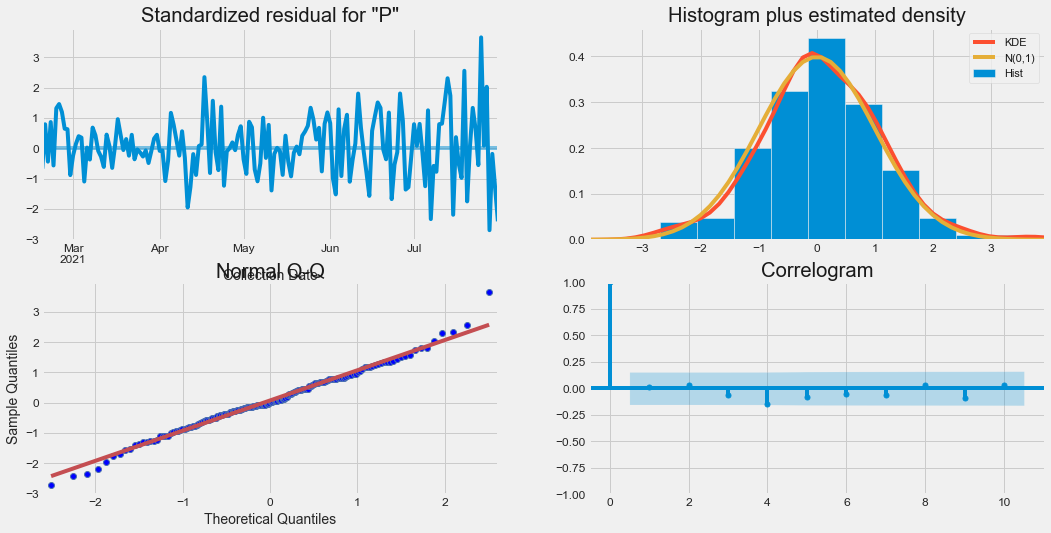

In [16]:
# Minimun AIC{} with paramaters {} 949.7490566043449 ((1, 1, 1), (0, 1, 1, 7))
#ARIMA(2, 1, 2)x(0, 2, 2, 7) - AIC:897.3830796027287

#Fit the model for the least value for optimal option
mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

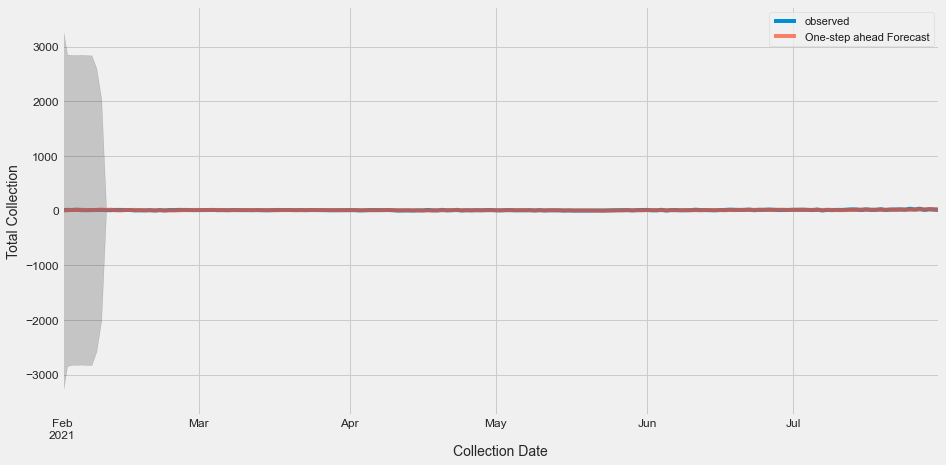

In [17]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection['Collection Date'][0]), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_resampled['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Collection Date')
ax.set_ylabel('Total Collection')
plt.legend()

plt.show()

In [18]:
y_forecasted_pv = pred.predicted_mean
y_truth = daily_resampled[dailycollection['Collection Date'][0]:]

mse_pvt_vehicle = ((y_forecasted_pv - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_pvt_vehicle, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_pvt_vehicle), 2)))

mse_pvt_vehicle = round(mse_pvt_vehicle, 2)
pv = {"mse":mse_pvt_vehicle, "forecast": y_forecasted_pv}
%store pv


The Mean Squared Error of our forecasts is 19.27
The Root Mean Squared Error of our forecasts is 4.39
Stored 'pv' (dict)


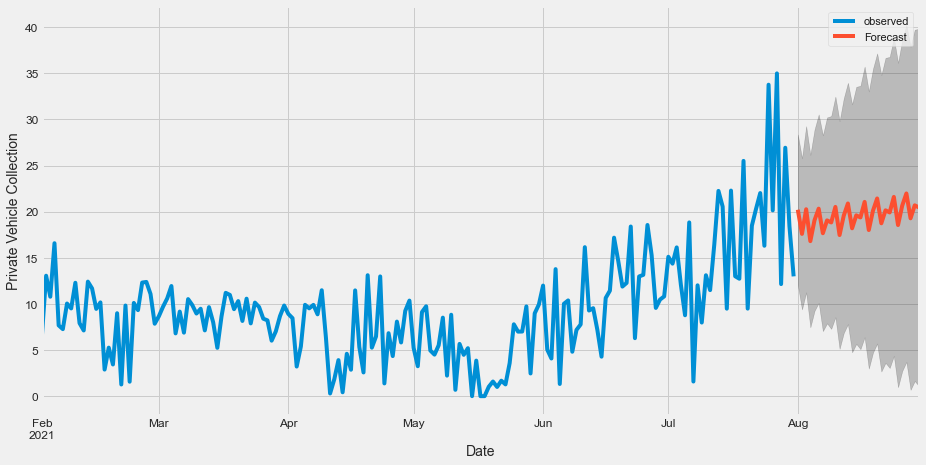

In [19]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Private Vehicle Collection')

plt.legend()
plt.show()

# Validating the one month forecast by splitting to 5:1 train to test ratio

In [20]:
idx = dailycollection_idx.loc[dailycollection_idx["Collection Date"] == '2021-06-30'].index[0]+1
dailycollection_train = daily_resampled[:idx]
dailycollection_test = daily_resampled[idx+1:]
aic_result = []
param_min_aci = {}
for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print(" AIC:{} Param:{}", min(aic_result), param_min_aci[min(aic_result)])

5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1074.7859063536553
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:936.6455201799904
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:852.7358541167121
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:839.7794044858905
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:769.1142902442882
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:721.4125285749805
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:934.8062178189306
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:776.194956004394
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:701.2045291806534
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:839.1495667101383
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:811.7499447866096
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:771.5201265931353
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:786.2321904658149
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:771.0503052723827
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 2, 7) - AI

In [21]:
print(aic_result.sort(reverse=True))

None


In [22]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of our forecasts is 80.07
The Root Mean Squared Error of our forecasts is 8.95


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7576      0.066    -11.541      0.000      -0.886      -0.629
ma.S.L7       -2.1492      0.145    -14.772      0.000      -2.434      -1.864
ma.S.L14       1.1819      0.175      6.743      0.000       0.838       1.525
sigma2         9.0422      2.052      4.406      0.000       5.020      13.064


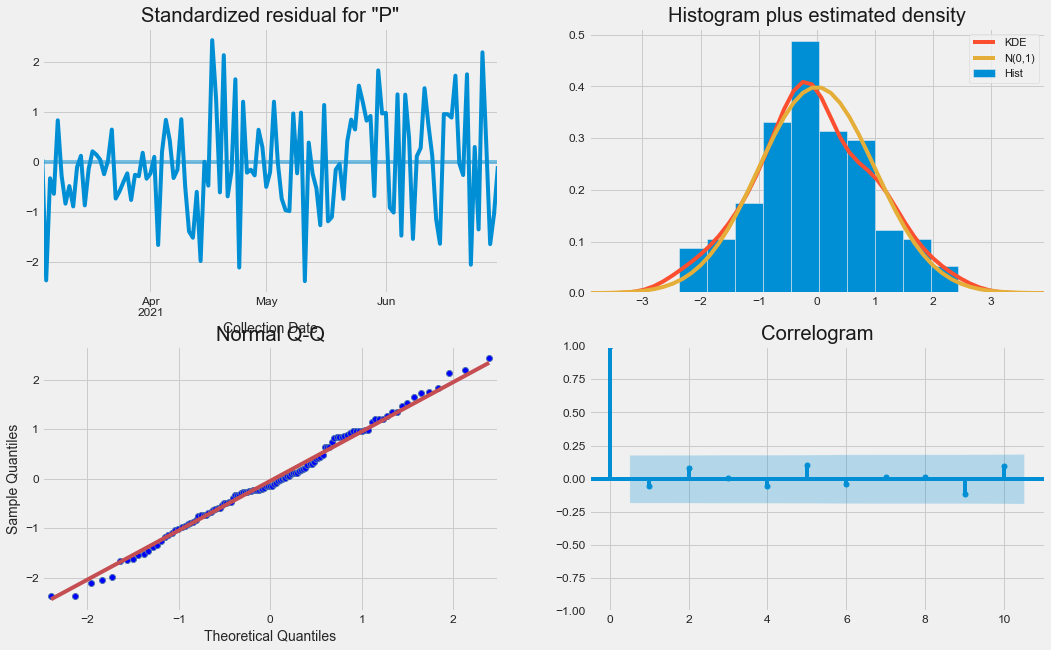

In [23]:
#AIC: {} Param: {} 665.8703478099884 ((0, 2, 2), (0, 2, 2, 7)) - 5 months(0,2)
#AIC: {} Param: {} 717.5197715185725 ((0, 1, 1), (0, 1, 1, 7)) - 5 months(0,3)


mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 10))
plt.show()


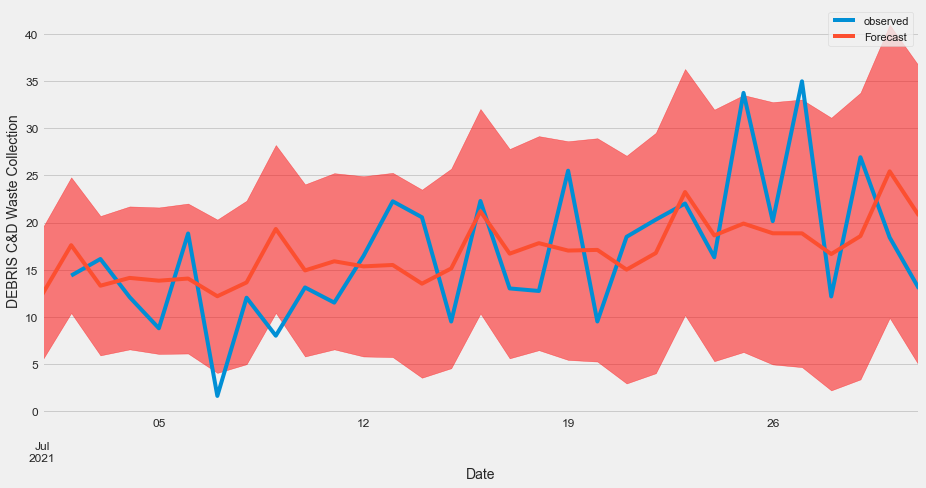

In [24]:
#Prediction Result Wrapper
pred_uc = results.get_forecast(steps=31)
#Confidence Interval
pred_ci = pred_uc.conf_int()

ax = dailycollection_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('DEBRIS C&D Waste Collection')

plt.legend()
plt.show()

In [25]:
y_forecasted = pred_uc.predicted_mean
y_truth = dailycollection_test
#
mse_debris = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))

The Mean Squared Error of our forecasts is 44.04
The Root Mean Squared Error of our forecasts is 6.64


      lb_stat  lb_pvalue
1    2.351392   0.125171
2    4.238404   0.120127
3    4.805985   0.186568
4    7.739820   0.101588
5    8.798415   0.117380
6   11.424170   0.076119
7   15.735910   0.027642
8   15.754764   0.046028
9   17.215081   0.045452
10  18.133032   0.052761
11  23.865510   0.013312
12  24.242341   0.018851
13  24.870794   0.024003
14  26.130153   0.024918
15  26.204691   0.035925
16  29.240426   0.022364
17  29.432168   0.030743
18  30.496018   0.032894
19  30.504616   0.045717
20  30.508557   0.062022


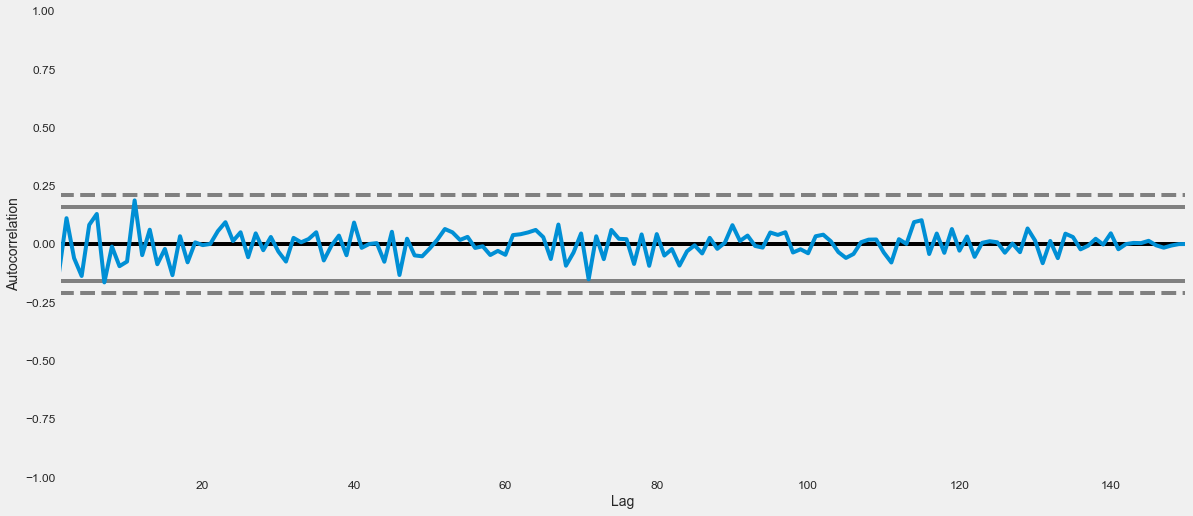

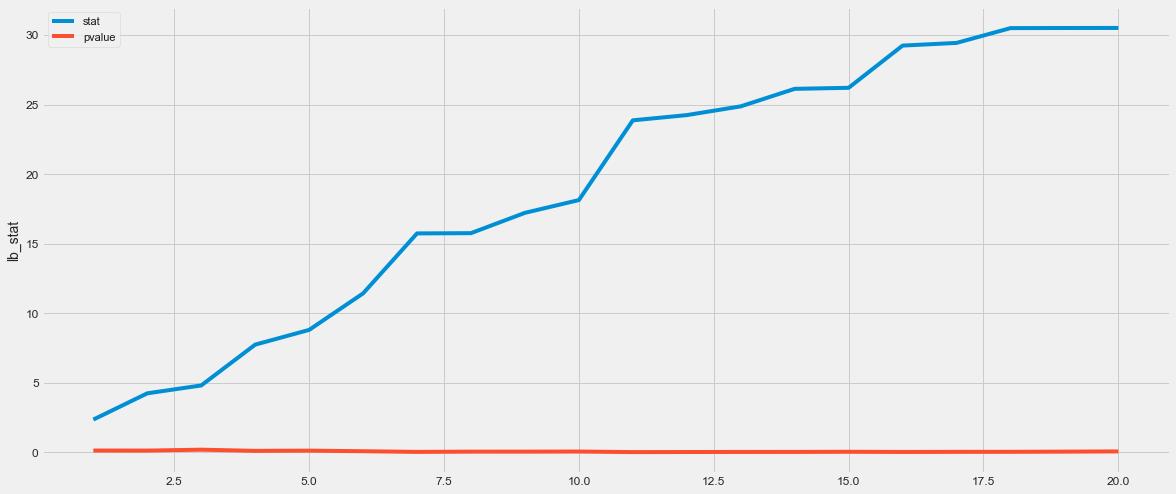

In [26]:
import statsmodels.api as sm
residual = results.resid
diagnostics = sm.stats.acorr_ljungbox(residual, lags=20, return_df= True)
print(diagnostics)
autocorrelation_plot(residual)
plt.show()
sns.lineplot(data = diagnostics["lb_stat"] ,  palette = 'green' , label ='stat')
sns.lineplot(data = diagnostics["lb_pvalue"],  palette = 'orange', label = 'pvalue' )
plt.legend()

In [27]:
# Train Test Generator
def rolling_forecast(train, min_train_length, horizon):
    for i in range(0, len(train) - min_train_length, 5):
        split_train = train[: min_train_length + i]
        split_val = train[min_train_length + i: min_train_length + i + horizon]
        yield split_train, split_val


###
# Training Set [4 months from 1st feb'2021  to 31st May'2021]
# Validation Set [1 month from 1st Jun '2021  to 30th July'2021]
# Test Set [31 steps from 31st July'2021 to 31st Aug' 2021]
###
SPLIT_DATE = '2021-07-01'
train = daily_resampled.loc[daily_resampled.index < SPLIT_DATE]

# # for testing rolling function
# cv_rolling = rolling_forecast(train, 120, 5)
#
# i = 0
# for split_train, split_val in cv_rolling:
#     print(f'CV[{i+1}]')
#     print(f'Train length:\t{len(split_train)}')
#     print(f'Test Set:\t{split_val}')
#     i += 1





CV[1]
The Mean Squared Error of our forecasts is 19.17
The Root Mean Squared Error of our forecasts is 4.38
CV[2]
The Mean Squared Error of our forecasts is 9.94
The Root Mean Squared Error of our forecasts is 3.15
CV[3]
The Mean Squared Error of our forecasts is 18.32
The Root Mean Squared Error of our forecasts is 4.28
CV[4]
The Mean Squared Error of our forecasts is 33.6
The Root Mean Squared Error of our forecasts is 5.8
CV[5]
The Mean Squared Error of our forecasts is 15.38
The Root Mean Squared Error of our forecasts is 3.92
CV[6]
The Mean Squared Error of our forecasts is 16.49
The Root Mean Squared Error of our forecasts is 4.06
Average RMSE score for 6 folds:  4.265
Min RMSE score 6 folds:  3.15
Score Length  6
                                     SARIMAX Results                                     
Dep. Variable:                   PRIVATE Vehicle   No. Observations:                  125
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -284.066


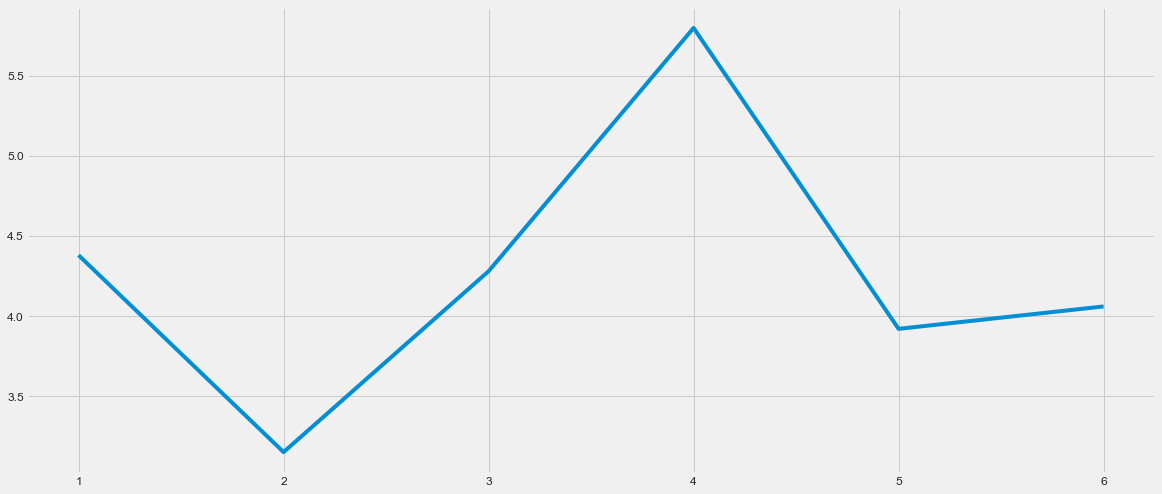

In [28]:
from numpy import mean

result_for_test = {}


def cross_validation_score(cv, order, seasonal_order):
    cv_scores = []
    i = 0
    for cv_train, cv_test in cv:
        model = sm.tsa.statespace.SARIMAX(cv_train,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        print(f'CV[{i + 1}]')
        # print(result.summary())
        y_forecasted = result.forecast(steps=len(cv_test))
        y_truth = cv_test
        mse = ((y_forecasted - y_truth) ** 2).mean()
        rmse = round(np.sqrt(mse), 2)
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
        cv_scores.append(rmse)
        result_for_test.update({rmse: result})
        i += 1
    return np.array(cv_scores)


cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(0, 1, 1), seasonal_order=(0, 1, 1, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
print("Score Length ", len(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

CV[1]
The Mean Squared Error of our forecasts is 31.91
The Root Mean Squared Error of our forecasts is 5.65
CV[2]
The Mean Squared Error of our forecasts is 7.47
The Root Mean Squared Error of our forecasts is 2.73
CV[3]
The Mean Squared Error of our forecasts is 18.91
The Root Mean Squared Error of our forecasts is 4.35
CV[4]
The Mean Squared Error of our forecasts is 38.2
The Root Mean Squared Error of our forecasts is 6.18
CV[5]
The Mean Squared Error of our forecasts is 26.87
The Root Mean Squared Error of our forecasts is 5.18
CV[6]
The Mean Squared Error of our forecasts is 21.29
The Root Mean Squared Error of our forecasts is 4.61
Average RMSE score for 6 folds:  4.783333333333333
Min RMSE score 6 folds:  2.73
                                     SARIMAX Results                                     
Dep. Variable:                   PRIVATE Vehicle   No. Observations:                  125
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 7)   Log Likelihood                -253.749
Dat

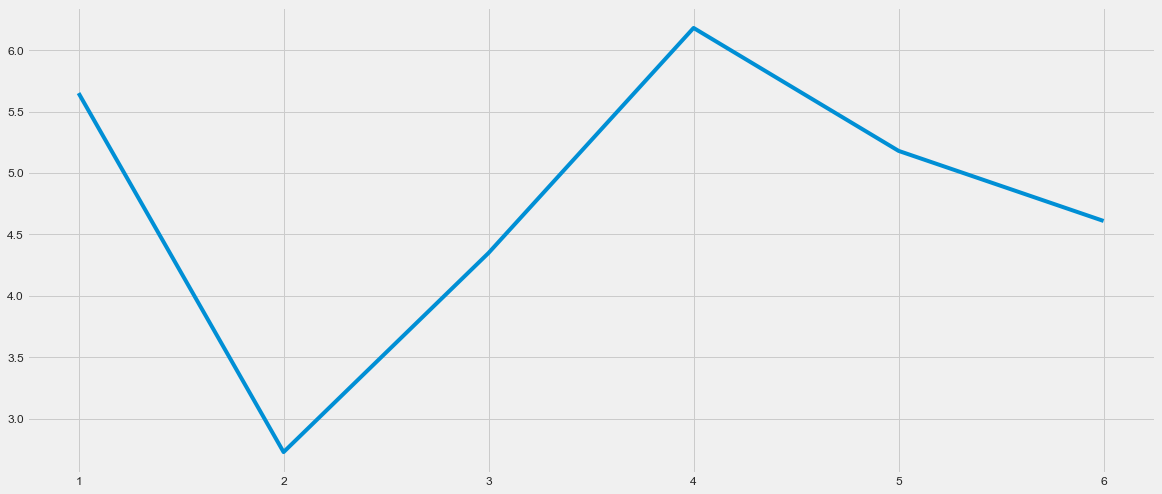

In [29]:

# Forecasting on unknown test set for specified parameters order = (0,2,2),seasonal_order =(0,2,2,7)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(0, 2, 2), seasonal_order=(0, 2, 2, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

CV[1]
The Mean Squared Error of our forecasts is 26.42
The Root Mean Squared Error of our forecasts is 5.14
CV[2]
The Mean Squared Error of our forecasts is 10.58
The Root Mean Squared Error of our forecasts is 3.25
CV[3]
The Mean Squared Error of our forecasts is 22.17
The Root Mean Squared Error of our forecasts is 4.71
CV[4]
The Mean Squared Error of our forecasts is 24.35
The Root Mean Squared Error of our forecasts is 4.93
CV[5]
The Mean Squared Error of our forecasts is 29.06
The Root Mean Squared Error of our forecasts is 5.39
CV[6]
The Mean Squared Error of our forecasts is 34.18
The Root Mean Squared Error of our forecasts is 5.85
Average RMSE score for 6 folds:  4.878333333333334
Minimum RMSE score:  3.25
                                     SARIMAX Results                                     
Dep. Variable:                   PRIVATE Vehicle   No. Observations:                  125
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 7)   Log Likelihood                -260.800
Date:

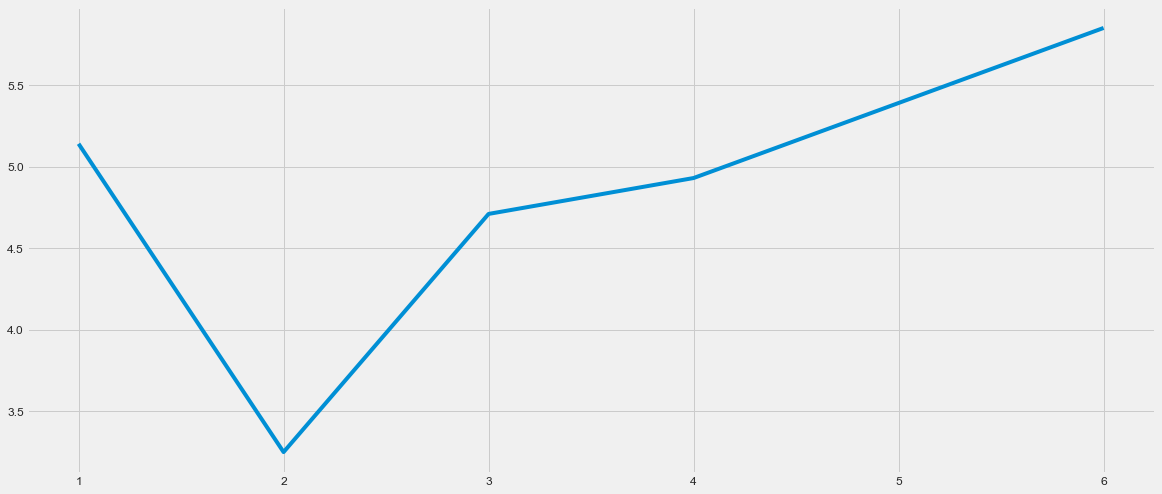

In [30]:
#Unspecified Parameters
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=param, seasonal_order=param_seasonal)
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Minimum RMSE score: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
